# Cyclistic, come può un sistema di bikesharing raggiungere rapidamente il successo?

**Guidare la strategia marketing attraverso i dati.**

## Introduzione

In questa analisi, esplorerò i dati di un'ipotetica azienda di bikesharing, Cyclistic, con l'obiettivo di comprendere come gli utenti occasionali e gli abbonati utilizzano il servizio, un elemento cruciale per garantire la sostenibilità e la crescita dell'azienda. 

Sulla base di queste informazioni, verrà elaborato un piano marketing mirato ad aumentare il numero degli abbonati.

## Dataset

I dati utilizzati per questo caso studio provengono da un dataset pubblico fornito da [Divvy Bikes](https://divvy-tripdata.s3.amazonaws.com/index.html), un servizio di bikesharing attivo nella città di Chicago. Questo dataset contiene informazioni dettagliate sulle singole corse, tra cui un identificativo univoco(delle singole corse), le stazioni di partenza e arrivo, la tipologia di bicicletta e la durata dei viaggi.  
Per questa analisi annuale ho utilizzato i dati riguardanti l'anno 2024. 

I dati vengono messi a disposizione con la seguente [licenza](https://divvybikes.com/data-license-agreement)

## Metodologia

Per rispondere alla domanda di ricerca, ho seguito i seguenti passaggi del processo dell'analisi dei dati: chiedere, preparare, elaborare, analizzare, condividire e agire. 

1.  **Definizione degli obiettivi e domande iniziali:**

L'obiettivo aziendale di Cyclistic è massimizzare il numero di abbonati annuali, poiché risultano più redditizi dei ciclisti occasionali (utenti con biglietti singoli o giornalieri). Invece di concentrarsi su nuovi clienti, la strategia è convertire gli utenti occasionali esistenti in abbonati annuali, dato che conoscono già il servizio.

Per raggiungere questo obiettivo, occorre comprendere le differenze di utilizzo tra abbonati e utenti occasionali, identificare i motivi per cui i ciclisti occasionali dovrebbero abbonarsi e analizzare come i media digitali possono supportare le strategie di marketing volte alla conversione, utilizzando i dati storici dei viaggi.

In sintesi, la domanda chiave nella fase "chiedere" è: "Come possiamo usare i dati per convertire efficacemente i ciclisti occasionali in abbonati annuali e aumentare la redditività di Cyclistic?"

Tre domande inoltre guideranno il futuro programma di marketing:
1. In che modo i membri annuali e i ciclisti occasionali utilizzano diversamente le biciclette Cyclistic?
2. Per quale motivo i ciclisti occasionali dovrebbero acquistare un abbonamento annuale a Cyclistic?
3. In che modo Cyclistic può utilizzare i media digitali per convincere i ciclisti occasionali a diventare abbonati?

2.  **Preparazione dei dati:**

In questa fase, l'obiettivo è caricare, esplorare e pulire i dati grezzi forniti da Divvy Bikes per l'anno 2024, assicurandomi che i dati siano in un formato utilizzabile per le analisi successive e gestendo eventuali problemi di qualità come valori mancanti o incoerenze.

È importante sottolineare che i dati a cui abbiamo avuto accesso presentano caratteristiche di elevata qualità:

* **Affidabilità:** Le informazioni sembrano essere accurate e consistenti, riflettendo l'operatività reale del servizio.
* **Originalità:** Il dataset proviene direttamente dalla fonte, garantendo l'integrità dei dati relativi alle corse.
* **Completezza:** Il dataset offre un insieme ricco di variabili essenziali per l'analisi del comportamento degli utenti e delle dinamiche di utilizzo.
* **Dati aggiornati:** Essendo dati storici recenti (anno 2024), forniscono una panoramica attuale delle tendenze di utilizzo del servizio.
* **Fonte:** La chiara indicazione della fonte permette la tracciabilità e la verifica dell'origine dei dati.

Queste caratteristiche mi permettono di procedere con la fase di elaborazione e analisi con una solida base di informazioni affidabili e pertinenti per raggiungere gli obiettivi del caso studio.

Occorre tenere a mente che i dati forniti non consentono, per questioni di privacy, di risalire alle informazioni personali dei ciclisti.

Il dataset si presenta in formato CSV, strutturato in tabelle.


**Anteprima del nome delle colonne e descrizione:**



**Identificatori e timing**:

- ride_id: ID univoco per ogni corsa
- started_at / ended_at: Data e ora di inizio/fine della corsa

**Tipo di mezzo**:

- rideable_type: Tipo di bicicletta (classic_bike, electric_bike, docked_bike)

**Stazioni**:

- start_station_name / end_station_name: Nome delle stazioni di partenza/arrivo
- start_station_id / end_station_id: ID numerico delle stazioni

**Coordinate geografiche**:

- start_lat / start_lng: Latitudine/longitudine punto partenza
end_lat / end_lng: Latitudine/longitudine punto arrivo

**Tipologia utente**:

- member_casual: Due tipi di riders: casual riders (occasionali) e member (abbonati)


## 1. Preparazione dati

### 1.1 Importazione librerie e pacchetti

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Importazione dataset

In [2]:
data = pd.read_csv('divvy2024.csv', index_col=0)

In [3]:
# creo una copia del dataframe e lo assegno alla variabile divvy
divvy = data.copy()

### 1.3 Panoramica dataset

**Visualizzare le prime righe**

In [4]:
divvy.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member


**Numero di righe e colonne**

In [5]:
data.shape

(5860568, 13)

Il dataset ha 5,86M di righe e 13 colonne.

**Tipi di dati**

In [6]:
print(data.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


## 2. Pulizia ed elaborazione

### 2.1 Gestione valori mancanti

**Eliminazione colonne superflue**

In [7]:
divvy.drop(["start_station_id", "end_station_id"], axis=1, inplace=True)

**Presenza valori mancanti**

In [8]:
divvy.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1073951
end_station_name      1104653
start_lat                   0
start_lng                   0
end_lat                  7232
end_lng                  7232
member_casual               0
dtype: int64

**Sostituzione valori mancanti**

Per affrontare l'elevato numero di valori mancanti nelle colonne delle stazioni di partenza e arrivo (oltre un milione), si utilizzeranno i dati di latitudine e longitudine. L'obiettivo è imputare i nomi delle stazioni mancanti trovando una corrispondenza con le coordinate esistenti.

A tal fine, si procederà con l'**arrotondamento delle coordinate a due cifre decimali**. Questa operazione è necessaria per standardizzare i valori e permettere una mappatura efficiente e precisa tra le coordinate e le rispettive stazioni, risolvendo così il problema della dispersione dei dati.

> Colonna `start_station_name`

In [9]:
# 1. Arrotondamento delle coordinate
divvy['start_lat_rounded'] = divvy['start_lat'].round(2)
divvy['start_lng_rounded'] = divvy['start_lng'].round(2)

# 2. Creazione della mappatura (mapping) per le stazioni di partenza
# Utilizziamo solo le righe senza valori mancanti nel nome della stazione
# per creare la nostra "tabella di verità"
start_mapping = divvy.dropna(subset=['start_station_name']).drop_duplicates(
    subset=['start_lat_rounded', 'start_lng_rounded']
).set_index(
    ['start_lat_rounded', 'start_lng_rounded']
)['start_station_name'].to_dict()

# 3. Imputazione dei valori mancanti
# Creiamo una nuova colonna temporanea con le coordinate arrotondate
divvy['start_coords'] = list(zip(divvy['start_lat_rounded'], divvy['start_lng_rounded']))

# Applichiamo la mappatura per riempire i valori mancanti
divvy['start_station_name'] = divvy['start_station_name'].fillna(
    divvy['start_coords'].map(start_mapping)
)

# 4. Pulizia
divvy = divvy.drop(columns=['start_lat_rounded', 'start_lng_rounded', 'start_coords'])

> Colonna `end_station_name`

In [10]:
# 1. Arrotondamento delle coordinate
divvy['end_lat_rounded'] = divvy['end_lat'].round(2)
divvy['end_lng_rounded'] = divvy['end_lng'].round(2)

# 2. Creazione della mappatura (mapping) per le stazioni di partenza
# Utilizziamo solo le righe senza valori mancanti nel nome della stazione
# per creare la nostra "tabella di verità"
end_mapping = divvy.dropna(subset=['end_station_name']).drop_duplicates(
    subset=['end_lat_rounded', 'end_lng_rounded']
).set_index(
    ['end_lat_rounded', 'end_lng_rounded']
)['end_station_name'].to_dict()

# 3. Imputazione dei valori mancanti
# Creiamo una nuova colonna temporanea con le coordinate arrotondate
divvy['end_coords'] = list(zip(divvy['end_lat_rounded'], divvy['end_lng_rounded']))

# Applichiamo la mappatura per riempire i valori mancanti
divvy['end_station_name'] = divvy['end_station_name'].fillna(
    divvy['end_coords'].map(end_mapping)
)

# 4. Pulizia
divvy = divvy.drop(columns=['end_lat_rounded', 'end_lng_rounded', 'end_coords'])

Check.

In [11]:
divvy.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     4689
end_station_name      43373
start_lat                 0
start_lng                 0
end_lat                7232
end_lng                7232
member_casual             0
dtype: int64

**Verifica degli altri dati mancanti**

Creazione database dove sono presenti almeno un valore mancante per riga.

In [12]:
divvy_missing = divvy[
    divvy['start_station_name'].isnull() | divvy['end_station_name'].isnull() | divvy['end_lat'].isnull() | divvy['end_lng'].isnull()
]


Dove sono concentrati queste voci?

In [13]:
divvy_missing.groupby('rideable_type')['member_casual'].value_counts()

rideable_type     member_casual
classic_bike      casual            5881
                  member            1351
electric_bike     casual           19879
                  member           19327
electric_scooter  casual             280
                  member              81
Name: count, dtype: int64

In [14]:
divvy_missing_electic_bike = divvy_missing[divvy_missing["rideable_type"]== "electric_bike"]
divvy_missing_electic_bike.tail(20)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
177842,15E4F648E71C3BC4,electric_bike,2024-12-25 13:58:41.886,2024-12-25 14:06:56.098,Evanston Civic Center,NaN,42.057044,-87.686554,42.04,-87.69,casual
177847,0C9491F36CE0B3CA,electric_bike,2024-12-24 14:58:58.261,2024-12-24 16:39:18.343,Public Rack - Keating & Peterson,NaN,41.990159,-87.747183,41.98,-87.73,member
177852,5488C321313661C9,electric_bike,2024-12-20 12:59:36.823,2024-12-20 13:09:01.506,Public Rack - Keating & Peterson,NaN,41.990159,-87.747183,41.98,-87.73,member
177964,ACF06640F94F0668,electric_bike,2024-12-15 19:53:33.506,2024-12-15 19:59:58.461,Benson Ave & Church St,NaN,42.048214,-87.683485,42.04,-87.68,member
178001,114842BD39C6C494,electric_bike,2024-12-19 14:45:56.602,2024-12-19 14:48:22.050,Benson Ave & Church St,NaN,42.048214,-87.683485,42.05,-87.69,casual
178011,AE9B07429488DA79,electric_bike,2024-12-22 22:56:10.639,2024-12-22 23:02:52.301,Southport Ave & Belmont Ave,NaN,41.939435,-87.663761,41.95,-87.64,member
178021,5924C24A487EDB9C,electric_bike,2024-12-02 09:08:52.100,2024-12-02 09:16:05.765,Benson Ave & Church St,NaN,42.048214,-87.683485,42.06,-87.67,member
178022,22CC9A9D92AC1746,electric_bike,2024-12-04 09:06:34.580,2024-12-04 09:12:44.339,Benson Ave & Church St,NaN,42.048214,-87.683485,42.06,-87.67,member
178075,473C99DFF821622B,electric_bike,2024-12-03 13:00:28.052,2024-12-03 13:05:34.677,Benson Ave & Church St,NaN,42.048214,-87.683485,42.06,-87.67,member
178079,D5BBA416147B12C3,electric_bike,2024-12-07 16:29:58.907,2024-12-07 16:37:24.568,Benson Ave & Church St,NaN,42.048214,-87.683485,42.06,-87.67,casual


In [15]:
divvy['end_station_name'].isnull().sum()

np.int64(43373)

I dati mancanti riscontrati nella colonna end_station_name sono prevalentemente associati all'utilizzo delle biciclette elettriche (electric_bike). Per preservare l'integrità del dataset e consentire un'analisi comparativa sull'utilizzo dei diversi mezzi, ho scelto di non eliminare queste righe. La strategia adottata consiste nell'imputare i valori mancanti, sostituendoli con la stringa descrittiva "Stazione non presente". Tale approccio permette di mantenere un set di dati completo, rendendo esplicita la mancanza di una stazione fisica di arrivo per questi specifici viaggi.

In [16]:
# Sostituisce i valori mancanti nella colonna 'end_station_name'
# dove il tipo di bici è 'electric_bike'
divvy.loc[
    divvy['end_station_name'].isnull(),
    'end_station_name'
] = 'Stazione non presente'

In [17]:
# Sostituisce i valori mancanti nella colonna 'start_station_name'
# dove il tipo di bici è 'electric_bike'
divvy.loc[
    divvy['start_station_name'].isnull(),
    'start_station_name'
] = 'Stazione non presente'

In [18]:
divvy.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
end_station_name         0
start_lat                0
start_lng                0
end_lat               7232
end_lng               7232
member_casual            0
dtype: int64

Sono stati riscontrati 7.232 valori mancanti nelle colonne end_lat e end_lng. Dato che questo numero rappresenta una percentuale trascurabile del dataset totale e i dati non sono essenziali per gli obiettivi dell'analisi, si è deciso di procedere con la rimozione di queste righe.

In [19]:
# Elimina le righe in cui 'end_lat' o 'end_lng' sono mancanti
divvy = divvy.dropna(subset=['end_lat', 'end_lng'])

In [20]:
divvy.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

Ora il dataset è pulito con assenza di valori mancanti.

### 2.2 Gestione variabili temporali

**Conversione in datetime**

In [21]:
divvy['started_at'] = pd.to_datetime(divvy['started_at'], format='mixed')
divvy['ended_at'] = pd.to_datetime(divvy['ended_at'], format='mixed')

**feature engineering: creazione nuove variabili temporali**

Per ottenere maggiori insight dal dataset procedo a creare delle nuove colonne con i seguenti dati: mese, giorno della settimana, ora del giorno, tipo di giorno (weekend, feriale) e durata della corsa in minuti

In [22]:
# Crea la colonna 'month' (mese)
divvy['month'] = divvy['started_at'].dt.month

# Crea la colonna 'weekday' (giorno della settimana: Lun=0, Dom=6)
divvy['weekday'] = divvy['started_at'].dt.weekday

# Crea la colonna 'hour' (ora del giorno)
divvy['hour'] = divvy['started_at'].dt.hour

# Crea la colonna 'day_type' (feriale/weekend)
divvy['day_type'] = divvy['weekday'].apply(
    lambda x: 'Weekend' if x >= 5 else 'Feriale'
)

# Calcola la 'ride_duration' in minuti
divvy['ride_duration'] = ((divvy['ended_at'] - divvy['started_at']).dt.total_seconds() / 60).astype(int)

#sostituisco i giorni della settimana assegnando una stringa al posto del numero
dizionario_sostituzioni_weekday = {
    0 : "Lun",
    1 : "Mar",
    2 : "Mer",
    3 : "Gio",
    4 : "Ven",
    5 : "Sab",
    6 : "Dom"
}

divvy["weekday"] = divvy["weekday"].replace(dizionario_sostituzioni_weekday)

#creazione colonna categoriale per fascia di orario

bins = [0, 6, 12, 18, 24]
labels = ['Notte', 'Mattina', 'Pomeriggio', 'Sera']
divvy['time_of_day'] = pd.cut(
    divvy['hour'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

Check.

In [23]:
divvy.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,month,weekday,hour,day_type,ride_duration,time_of_day
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,Kingsbury St & Kinzie St,41.903267,-87.634737,41.889177,-87.638506,member,1,Ven,15,Feriale,7,Pomeriggio
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,Kingsbury St & Kinzie St,41.902937,-87.634440,41.889177,-87.638506,member,1,Lun,15,Feriale,7,Pomeriggio
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,Kingsbury St & Kinzie St,41.902951,-87.634470,41.889177,-87.638506,member,1,Sab,12,Weekend,8,Pomeriggio
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,Larrabee St & Webster Ave,41.884295,-87.633963,41.921822,-87.644140,member,1,Lun,16,Feriale,29,Pomeriggio
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,Kingsbury St & Kinzie St,41.948797,-87.675278,41.889177,-87.638506,member,1,Mer,5,Feriale,26,Notte


### 2.3 Ispezione e pulizia delle altre variabili

**Colonna ride_id**

Controllo duplicati.

In [24]:
divvy["ride_id"].duplicated().sum()

np.int64(171)

Eliminazione duplicati.

In [25]:
# Rimuove i duplicati in base al 'ride_id',
# mantenendo l'ultima occorrenza
divvy = divvy.drop_duplicates(subset=['ride_id'], keep='last')

**colonne rideable_type, member casual**. 

Controllo valori univoci.

In [26]:
# Seleziona la colonna 'rideable_type' dal dataframe 'divvy'
# e utilizza il metodo .unique() per ottenere un array con tutti
# i tipi di veicoli unici disponibili (es. "classic_bike", "electric_bike", ecc.).
divvy["rideable_type"].unique()

array(['electric_bike', 'classic_bike', 'electric_scooter'], dtype=object)

Ok!

In [27]:
divvy["member_casual"].unique()

array(['member', 'casual'], dtype=object)

Ok!

### 2.4 Distribuzione dei dati
Colonna `ride_duration`

In [28]:
#riepilogo statistico della colonna ride_duration
divvy["ride_duration"].describe()

count    5.853165e+06
mean     1.498661e+01
std      3.282440e+01
min     -2.748000e+03
25%      5.000000e+00
50%      9.000000e+00
75%      1.700000e+01
max      1.509000e+03
Name: ride_duration, dtype: float64

Ci sono dei valori massimi troppo elevati (1500 minuti sono circa 25 ore) e dei valori minimi in negativo.

Verifico.

In [29]:
#filtro i dati per le durate sotto i 0 minuti
divvy_ride_neg = divvy[divvy["ride_duration"] < 0]
divvy_ride_neg.shape

(95, 17)

Posso procedere a elimanare queste voci e le durate di viaggio inferiori a 1 minuto che rientrano in test, manutenzione o false partenze.

In [30]:
#filtro i dati per le durate superiori o uguali a 1 minuto

divvy = divvy[divvy['ride_duration'] >= 1]


Controllo la distribuzione degli altri dati.

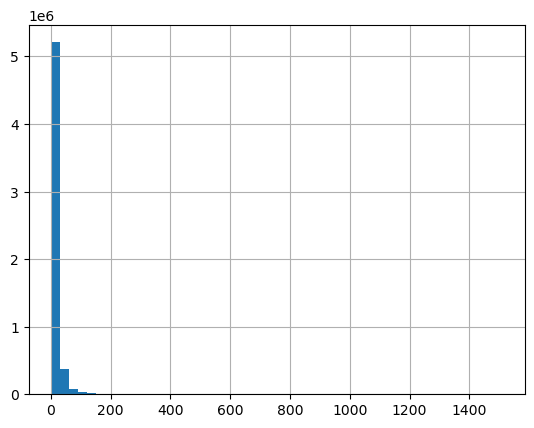

In [31]:
#istogramm dei valori in ride_duration
divvy['ride_duration'].hist(bins=50)
plt.show()

Mantengo soltanto i valori con corse che vanno fino ad un massimo di 120 minuti.

In [32]:
# aggiorno il dataset con soli valori inferiori o uguali a 120 minuti
divvy = divvy[divvy["ride_duration"] <= 120]

**Creazione categorie di durata di viaggio**

In [33]:
# Nuovi intervalli e etichette per includere la categoria "molto brevi"
bins = [0, 2, 5, 15, 30, 60, 120]
labels = ['Molto brevi (<2 min)', 'Brevi (2-5 min)', 'Medie (6-15 min)', 'Lunghe (16-30 min)', 'Molto lunghe (31-60 min)', 'Lunghissime (61-120 min)']

divvy['ride_duration_category'] = pd.cut(
    divvy['ride_duration'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

print(divvy['ride_duration_category'].value_counts())

ride_duration_category
Medie (6-15 min)            2839080
Lunghe (16-30 min)          1193744
Brevi (2-5 min)             1000200
Molto lunghe (31-60 min)     431113
Molto brevi (<2 min)         111144
Lunghissime (61-120 min)     111075
Name: count, dtype: int64


## 3. Esportazione DataFrame e prossimi passi

### 3.1 Esportazione DataFrame

Per mantenere le formattazioni invariate e poter lavorare direttamente con un dataframe pulito, esporto il dataframe in formato `parquet`.

In [34]:
# esporto il dataframe in formato paquet
divvy.to_parquet('divvy_clean.parquet', index=False)

### 3.2 Conclusione e Prossimi Passi
In questo notebook, ho completato tutte le fasi di pulizia ed elaborazione dei dati del mio dataset Divvy. Ho gestito i valori mancanti, creato nuove colonne informative come ride_duration, month, weekday, hour e time_of_day, e ho preparato il set di dati per un'analisi approfondita.

Per non dover ripetere questi passaggi, ho salvato il DataFrame pulito nel file divvy_clean.parquet.

Nel [prossimo notebook](), userò questo set di dati pulito per esplorare le abitudini di utilizzo del servizio di bike sharing e trarre conclusioni significative attraverso l'analisi esplorativa dei dati (EDA) e la visualizzazione dei dati.